In [1]:
% load_ext autoreload
% autoreload 2

import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.datasets.synthetic_multivariate_dataset import SyntheticMultivariateDataset

TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Test pipeline implementation

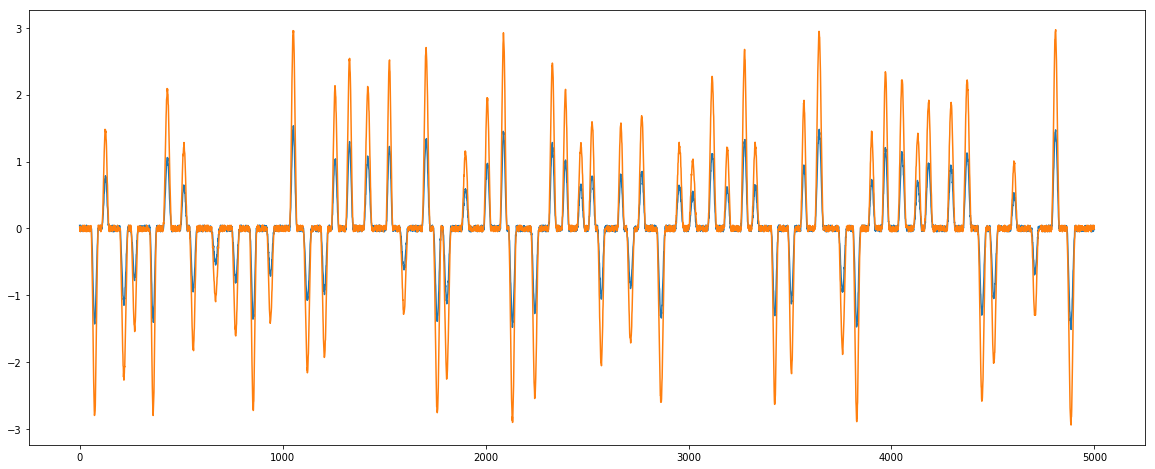

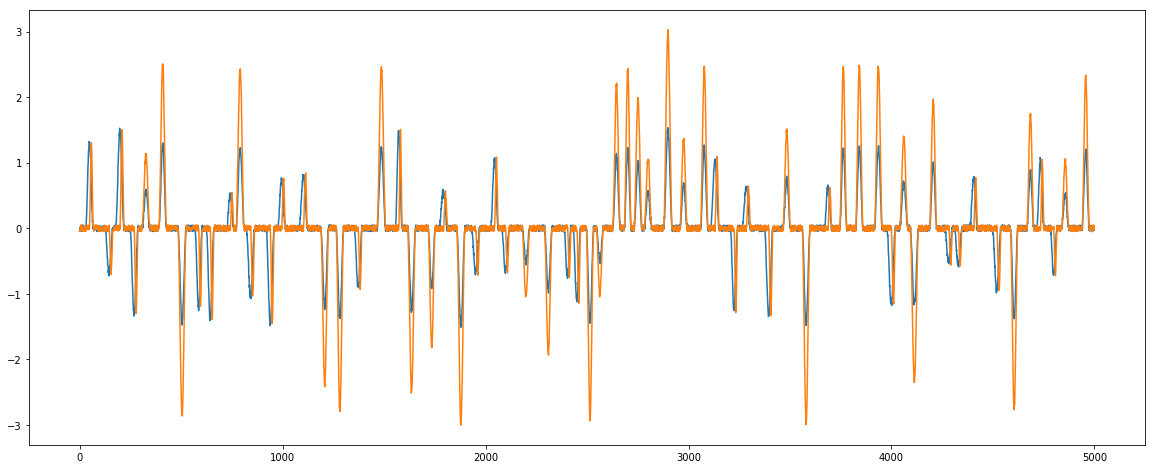

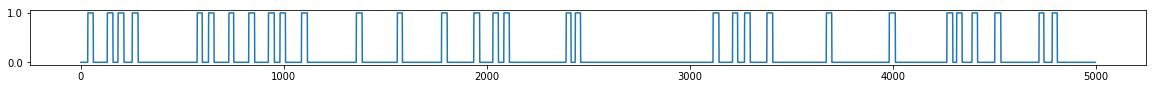

In [9]:
dataset = SyntheticMultivariateDataset()
X_train, y_train, X_test, y_test = dataset.data()

plt.figure(figsize=(20, 8))
plt.plot(X_train)

plt.figure(figsize=(20, 8))
plt.plot(X_test)

plt.figure(figsize=(20, 1))
plt.yticks((0, 1), ("0.0", "1.0"))
plt.plot(y_test)